# Cleaning Data in Python

### Libraries and datasets

In [45]:
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt
import recordlinkage

ride_sharing = pd.read_csv('datasets/ride_sharing_new.csv', index_col=0)
banking = pd.read_csv('datasets/banking_dirty.csv', index_col=0)
airlines = pd.read_csv('datasets/airlines_final.csv', index_col=0)
restaurants = pd.read_csv('datasets/restaurants_L2.csv', index_col=0)
restaurants_new = pd.read_csv('datasets/restaurants_L2_dirty.csv', index_col=0)
airlines[['cleanliness','safety','satisfaction']] = airlines[['cleanliness','safety','satisfaction']].astype('category')

cleanliness_list = ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty']
safety_list = ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe']
satisfaction_list = ['Very satisfied','Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
categories_dict = {'cleanliness':cleanliness_list, 'safety':safety_list, 'satisfaction':satisfaction_list}
categories = pd.DataFrame(categories_dict, dtype='category')

## 1. Common data problems

### Numeric data or ... ?
Instructions:
<ul>
<li>Print the information of ride_sharing.</li>
<li>Use .describe() to print the summary statistics of the user_type column from ride_sharing.</li>
<li>Convert user_type into categorical by assigning it the 'category' data type and store it in the user_type_cat column.</li>
<li>Make sure you converted user_type_cat correctly by using an assert statement.</li>
</ul>

In [5]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


### Summing strings and concatenating numbers
Instructions:
<ul>
<li>Use the .strip() method to strip duration of "minutes" and store it in the duration_trim column.</li>
<li>Convert duration_trim to int and store it in the duration_time column.</li>
<li>Write an assert statement that checks if duration_time's data type is now an int.</li>
<li>Print the average ride duration.</li>
</ul>

In [6]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


### Tire size constraints
Instructions:
<ul>
<li>Convert the tire_sizes column from category to 'int'.</li>
<li>Use .loc[] to set all values of tire_sizes above 27 to 27.</li>
<li>Reconvert back tire_sizes to 'category' from int.</li>
<li>Print the description of the tire_sizes.</li>
</ul>

In [ ]:
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

### Back to the future
Instructions:
<ul>
<li>Convert ride_date to a datetime object using to_datetime(), then convert the datetime object into a date and store it in ride_dt column.</li>
<li>Create the variable today, which stores today's date by using the dt.date.today() function.</li>
<li>For all instances of ride_dt in the future, set them to today's date.</li>
<li>Print the maximum date in the ride_dt column.</li>
</ul>

In [ ]:
# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

### Finding duplicates
Instructions:
<ul>
<li>Find duplicated rows of ride_id in the ride_sharing DataFrame while setting keep to False.</li>
<li>Subset ride_sharing on duplicates and sort by ride_id and assign the results to duplicated_rides.</li>
<li>Print the ride_id, duration and user_birth_year columns of duplicated_rides in that order.</li>
</ul>

In [ ]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset='ride_id', keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

### Treating duplicates
Instructions:
<ul>
<li>Drop complete duplicates in ride_sharing and store the results in ride_dup.</li>
<li>Create the statistics dictionary which holds minimum aggregation for user_birth_year and mean aggregation for duration.</li>
<li>Drop incomplete duplicates by grouping by ride_id and applying the aggregation in statistics.</li>
<li>Find duplicates again and run the assert statement to verify de-duplication.</li>
</ul>

In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

## 2. Text and categorical data problems

### Finding consistency
Instructions:
<ul>
<li>Print the categories DataFrame and take a close look at all possible correct categories of the survey columns.</li>
<li>Print the unique values of the survey columns in airlines using the .unique() method.</li>
<li>Create a set out of the cleanliness column in airlines using set() and find the inconsistent category by finding the difference in the cleanliness column of categories.</li>
<li>Find rows of airlines with a cleanliness value not in categories and print the output.</li>
<li>Print the rows with the consistent categories of cleanliness only.</li>
</ul>

In [35]:
# Print categories DataFrame
display(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
display(airlines[cat_clean_rows])

# Print rows with consistent categories only
display(airlines[cat_clean_rows == False])

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


Cleanliness:  ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty']
Categories (5, object): ['Average', 'Clean', 'Dirty', 'Somewhat clean', 'Somewhat dirty'] 

Safety:  ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe']
Categories (5, object): ['Neutral', 'Somewhat safe', 'Somewhat unsafe', 'Very safe', 'Very unsafe'] 

Satisfaction:  ['Very satisfied', 'Neutral', 'Somewhat satsified', 'Somewhat unsatisfied', 'Very unsatisfied']
Categories (5, object): ['Neutral', 'Somewhat satsified', 'Somewhat unsatisfied', 'Very satisfied', 'Very unsatisfied'] 



,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction


,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...
2804,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified
2805,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2806,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2807,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


### Inconsistent categories
Instructions:
<ul>
<li>Print the unique values in dest_region and dest_size respectively.</li>
<li>Change the capitalization of all values of dest_region to lowercase.</li>
<li>Replace the 'eur' with 'europe' in dest_region using the .replace() method.</li>
<li>Strip white spaces from the dest_size column using the .strip() method.</li>
<li>Verify that the changes have been into effect by printing the unique values of the columns using .unique().</li>
</ul>

In [4]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


### Remapping categories
Instructions:
<ul>
<li>Create the ranges and labels for the wait_type column mentioned in the description.</li>
<li>Create the wait_type column by from wait_min by using pd.cut(), while inputting label_ranges and label_names in the correct arguments.</li>
<li>Create the mapping dictionary mapping weekdays to 'weekday' and weekend days to 'weekend'.</li>
<li>Create the day_week column by using .replace().</li>
</ul>

In [5]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

### Removing titles and taking names
Instructions:
<ul>
<li>Remove "Dr.", "Mr.", "Miss" and "Ms." from full_name by replacing them with an empty string "" in that order.</li>
<li>Run the assert statement using .str.contains() that tests whether full_name still contains any of the honorifics.</li>
</ul>

In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

### Keeping it descriptive
Instructions:
<ul>
<li>Using the airlines DataFrame, store the length of each instance in the survey_response column in resp_length by using .str.len().</li>
<li>Isolate the rows of airlines with resp_length higher than 40.</li>
<li>Assert that the smallest survey_response length in airlines_survey is now bigger than 40.</li>
</ul>

In [ ]:
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

## 3. Advanced data problems

### Uniform currencies
Instructions:
<ul>
<li>Find the rows of acct_cur in banking that are equal to 'euro' and store them in the variable acct_eu.</li>
<li>Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.</li>
<li>Find all the rows of acct_cur in banking that fit the acct_eu condition, set them to 'dollar'.</li>
</ul>

In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

### Uniform dates
Instructions:
<ul>
<li>Print the header of account_opened from the banking DataFrame and take a look at the different results.</li>
<li>Convert the account_opened column to datetime, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.</li>
<li>Extract the year from the amended account_opened column and assign it to the acct_year column.</li>
<li>Print the newly created acct_year column.</li>
</ul>

In [5]:
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object
0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


### How's our data integrity?
Instructions:
<ul>
<li>Find the rows where the sum of all rows of the fund_columns in banking are equal to the inv_amount column.</li>
<li>Store the values of banking with consistent inv_amount in consistent_inv, and those with inconsistent ones in inconsistent_inv.</li>
<li>Store today's date into today, and manually calculate customers' ages and store them in ages_manual.</li>
<li>Find all rows of banking where the age column is equal to ages_manual and then filter banking into consistent_ages and inconsistent_ages.</li>
</ul>

In [ ]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

### Missing investors
Instructions:
<ul>
<li>Print the number of missing values by column in the banking DataFrame.</li>
<li>Plot and show the missingness matrix of banking with the msno.matrix() function.</li>
<li>Isolate the values of banking missing values of inv_amount into missing_investors and with non-missing inv_amount values into investors.</li>
<li>Sort the banking DataFrame by the age column and plot the missingness matrix of banking_sorted.</li>
</ul>

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


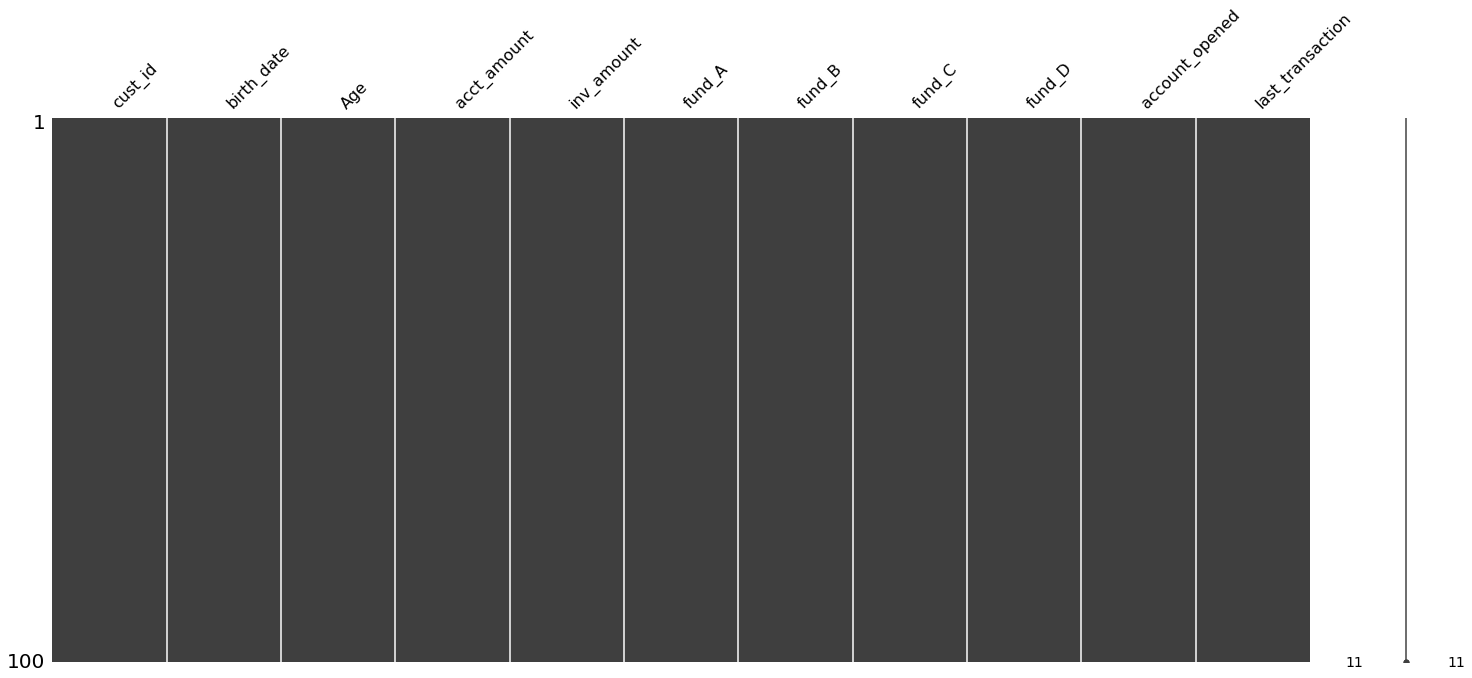

In [14]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='age')
msno.matrix(banking_sorted)
plt.show()

### Follow the money
Instructions:
<ul>
<li>Use .dropna() to drop missing values of the cust_id column in banking and store the results in banking_fullid.</li>
<li>Use inv_amount to compute the estimated account amounts for banking_fullid by setting the amounts equal to inv_amount * 5, and assign the results to acct_imp.</li>
<li>Impute the missing values of acct_amount in banking_fullid with the newly created acct_imp using .fillna().</li>
</ul>

In [15]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


## 4. Record linkage

### The cutoff point
Instructions:
<ul>
<li>Import process from fuzzywuzzy.</li>
<li>Store the unique cuisine_types into unique_types.</li>
<li>Calculate the similarity of 'asian', 'american', and 'italian' to all possible cuisine_types using process.extract(), while returning all possible matches.</li>
</ul>

In [38]:
# Import process from fuzzywuzzy
from fuzzywuzzy import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('italian', 67), ('american', 62), ('mexican', 50), ('cajun', 40), ('southwestern', 36), ('southern', 31), ('coffeebar', 26), ('steakhouses', 25)]
[('american', 100), ('mexican', 80), ('cajun', 68), ('asian', 62), ('italian', 53), ('southwestern', 41), ('southern', 38), ('coffeebar', 24), ('steakhouses', 21)]
[('italian', 100), ('asian', 67), ('mexican', 43), ('american', 40), ('cajun', 33), ('southern', 27), ('southwestern', 26), ('steakhouses', 26), ('coffeebar', 12)]


### Remapping categories II
Instructions:
<ul>
<li>Return all of the unique values in the cuisine_type column of restaurants.</li>
</ul>

<ul>
Okay! Looks like you will need to use some string matching to correct these misspellings!
<li>As a first step, create a list of all possible matches, comparing 'italian' with the restaurant types listed in the cuisine_type column.</li>
</ul>

<ul>
Now you're getting somewhere! Now you can iterate through matches to reassign similar entries.
<li>Within the for loop, use an if statement to check whether the similarity score in each match is greater than or equal to 80.</li>
<li>If it is, use .loc to select rows where cuisine_type in restaurants is equal to the current match (which is the first element of match), and reassign them to be 'italian'.</li>
</ul>

<ul>
Finally, you'll adapt your code to work with every restaurant type in categories.
<li>Using the variable cuisine to iterate through categories, embed your code from the previous step in an outer for loop.</li>
<li>Inspect the final result. This has been done for you.</li>
</ul>

In [40]:
# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['type'], limit=len(restaurants.type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['type'] == match[0]] = cuisine
      
# Inspect the final result
print(restaurants['type'].unique())

['american' 'asian' 'italian' 'coffeebar' 'mexican' 'southwestern'
 'steakhouses' 'southern' 'cajun']


### Pairs of restaurants
Instructions:
<ul>
<li>Instantiate an indexing object by using the Index() function from recordlinkage.</li>
<li>Block your pairing on cuisine_type by using indexer's' .block() method.</li>
<li>Generate pairs by indexing restaurants and restaurants_new in that order.</li>
</ul>

In [47]:
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

### Similar restaurants
Instructions:
<ul>
<li>Instantiate a comparison object using the recordlinkage.Compare() function.</li>
<li>Use the appropriate comp_cl method to find exact matches between the city and cuisine_type columns of both DataFrames.</li>
<li>Use the appropriate comp_cl method to find similar strings with a 0.8 similarity threshold in the rest_name column of both DataFrames.</li>
<li>Compute the comparison of the pairs by using the .compute() method of comp_cl.</li>
</ul>

In [49]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('type', 'type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('name', 'name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

        city  cuisine_type  name
0   0      0             1   0.0
    1      0             1   0.0
    7      0             1   0.0
    12     0             1   0.0
    13     0             1   0.0
...      ...           ...   ...
40  18     0             1   0.0
281 18     0             1   0.0
288 18     0             1   0.0
302 18     0             1   0.0
308 18     0             1   0.0

[3631 rows x 3 columns]


### Linking them together!
Instructions:
<ul>
<li>Isolate instances of potential_matches where the row sum is above or equal to 3 by using the .sum() method.</li>
<li>Extract the second column index from matches, which represents row indices of matching record from restaurants_new by using the .get_level_values() method.</li>
<li>Subset restaurants_new for rows that are not in matching_indices.</li>
<li>Append non_dup to restaurants.</li>
</ul>

In [50]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)

                         name                       addr               city  \
0   arnie morton's of chicago   435 s. la cienega blv .         los angeles   
1          art's delicatessen       12224 ventura blvd.         studio city   
2                   campanile       624 s. la brea ave.         los angeles   
3                       fenix    8358 sunset blvd. west           hollywood   
4          grill on the alley           9560 dayton way         los angeles   
..                        ...                        ...                ...   
76                        don        1136 westwood blvd.           westwood   
77                      feast        1949 westwood blvd.            west la   
78                   mulberry        17040 ventura blvd.             encino   
80                    jiraffe      502 santa monica blvd       santa monica   
81                   martha's  22nd street grill 25 22nd  st. hermosa beach   

         phone         type  
0   3102461501     am

C:\Users\pedro\AppData\Local\Temp\ipykernel_14816\2868928257.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_restaurants = restaurants.append(non_dup)
